In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

### A. Basic Data Cleaning
1. Read the file "Bank.csv", assign it a variable name "df" and display the first 5 lines.

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Bank.csv')
df.head(5)

,Age,Experience,Income,Branch Address,Family,CCAvg,Mortgage,Personal Loan,Brokerage Account,GIC Account,Online,CreditCard,Advisor Name,Advisor Designation,Advisor Branch Addresses
0,50,24,11,234 Blue Spring Rd.,4,0.6,0,0,0,0,0,1,Carolin Whitmire,PFP,234 Blue Spring Rd.;533 Hillcrest Street;94 Co...
1,31,7,173,218 S. Westport Court,1,6,0,0,0,0,1,0,Marylee Bristow,PFP,218 S. Westport Court;9587 SW. Jefferson Stree...
2,41,16,10,9834 East Pineknoll Ave.,2,0.3,0,0,0,0,1,0,Corazon Eastin,PFP,336 Pin Oak Ave.;9834 East Pineknoll Ave.;742 ...
3,53,27,44,7330 West Grand St.,4,1.5,0,0,0,0,0,0,Beatriz Rolf,PFP,7330 West Grand St.;91 Lake Court;7041 East Ma...
4,29,5,33,36 Kent Court,1,1.8,78,0,0,0,1,0,Zofia Rambo,PFP,40 E. Dunbar Ave.;36 Kent Court;69 Spruce Dr.


2. Use `info` method to examine the data.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4499 entries, 0 to 4498
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       4499 non-null   int64 
 1   Experience                4499 non-null   int64 
 2   Income                    4499 non-null   int64 
 3   Branch Address            4499 non-null   object
 4   Family                    4499 non-null   int64 
 5   CCAvg                     4499 non-null   object
 6   Mortgage                  4499 non-null   int64 
 7   Personal Loan             4499 non-null   int64 
 8   Brokerage Account         4499 non-null   int64 
 9   GIC Account               4499 non-null   int64 
 10  Online                    4499 non-null   int64 
 11  CreditCard                4499 non-null   int64 
 12  Advisor Name              4499 non-null   object
 13  Advisor Designation       4499 non-null   object
 14  Advisor Branch Addresses

3. The values of column "CCAvg" is numeric but is stored as an object. Inspect the elements of this column and convert it to numeric datatype. Hint: Look up `str`, `replace` and `to_numeric` methods.

In [ ]:
# Step 1: Inspect the elements of the column
print(df['CCAvg']) #dtype: object

0       0.6
1         6
2       0.3
3       1.5
4       1.8
       ... 
4494    1.8
4495    0.5
4496    1.8
4497    0.7
4498    2.2
Name: CCAvg, Length: 4499, dtype: object


In [ ]:
# Step 2: remove comma in numbers, and convert them to numeric
df['CCAvg'] = pd.to_numeric(df['CCAvg'].str.replace(',', ''))

4. Obtain summary stats of all numeric columns. Hint: Look up `describe` method.

In [ ]:
df.describe()

,Age,Experience,Income,Family,CCAvg,Mortgage,Personal Loan,Brokerage Account,GIC Account,Online,CreditCard
count,4499.000000,4499.000000,4499.000000,4499.000000,4499.000000,4499.000000,4499.000000,4499.000000,4499.000000,4499.000000,4499.000000
mean,45.268282,20.028895,74.303401,2.398088,1.995840,56.085575,0.106690,0.108691,0.064903,0.592132,0.296733
std,11.454680,11.461481,46.310561,1.147040,3.435606,101.788264,0.308754,0.311286,0.246383,0.491493,0.456868
min,23.000000,-3.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.600000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,55.000000,30.000000,99.000000,3.000000,2.600000,99.500000,0.000000,0.000000,0.000000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,200.000000,617.000000,1.000000,1.000000,1.000000,1.000000,1.000000


5. Do the statistical summaries makes sense for all columns? If not, for which columns does it not make sense? Convert the data type of these columns to `category`. Then, run the method `describe` on categorical columns only. Hint: Look up `astype` method and documentation of `describe` in detail.

No, there are some categorical variables with max = 1 and min = 0.

Columns does not make sense: Personal loan, Brokerage Account, GIC Account, Online Credit Card


In [ ]:
# Convert selected columns to category datatype
category_columns = ['Personal Loan', 'Brokerage Account', 'GIC Account', 'Online', 'CreditCard']
df[category_columns] = df[category_columns].astype('category')

In [ ]:
# Run describe on categorical columns only
df.describe(include = 'category')

,Personal Loan,Brokerage Account,GIC Account,Online,CreditCard
count,4499,4499,4499,4499,4499
unique,2,2,2,2,2
top,0,0,0,1,0
freq,4019,4010,4207,2664,3164


6. Check the frequency of unique values in column "Advisor Designation". Hint: Look up `value_counts` method.

In [ ]:
df['Advisor Designation'].value_counts()

PFP    3386
CFP    1113
Name: Advisor Designation, dtype: int64

7. Create a new column called "CFP", whose value is 1 if "Advisor Designation" column has value "CFP"  otherwise the value is 0. This is one way of creating dummy variable. Hint: Utilize `np.where` method.

In [ ]:
df['CFP'] = np.where(df['Advisor Designation']== 'CFP', 1, 0)

8. Convert the datatype of columns with textual values to string.

In [ ]:
textual_columns = df.select_dtypes(include=['object']).columns
df[textual_columns] = df[textual_columns].astype(str)

9. Notice that "Advisor Branch Addresses" column has multiple addresses. Expand the column such that each address is in a new column. Add these columns to the dataframe with appropriate name. Hint: Look up `str` and `split` methods.

In [ ]:
address_columns = df['Advisor Branch Addresses'].str.split(';', expand= True)
new_column_names = [f"Address_{i+1}" for i in range(address_columns.shape[1])]
address_columns.columns = new_column_names
df = pd.concat([df, address_columns], axis=1)

In [ ]:
df[new_column_names]

,Address_1,Address_2,Address_3
0,234 Blue Spring Rd.,533 Hillcrest Street,94 Country Club St.
1,218 S. Westport Court,9587 SW. Jefferson Street,9670 Wilson Rd.
2,336 Pin Oak Ave.,9834 East Pineknoll Ave.,742 Bridle Street
3,7330 West Grand St.,91 Lake Court,7041 East Mammoth Drive
4,40 E. Dunbar Ave.,36 Kent Court,69 Spruce Dr.
...,...,...,...
4494,8376 Euclid Lane,336 Pin Oak Ave.,9834 East Pineknoll Ave.
4495,9587 SW. Jefferson Street,9670 Wilson Rd.,76 Mayfair St.
4496,387 West Fifth Ave.,8536 Country Club Dr.,234 Blue Spring Rd.
4497,336 Pin Oak Ave.,9834 East Pineknoll Ave.,742 Bridle Street


10. Drop all original columns that now have duplicate information.

In [ ]:
# Drop the original "Advisor Branch Addresses" column
df.drop(columns=['Advisor Branch Addresses'], inplace=True)

In [ ]:
df

,Age,Experience,Income,Branch Address,Family,CCAvg,Mortgage,Personal Loan,Brokerage Account,GIC Account,Online,CreditCard,Advisor Name,Advisor Designation,CFP,Address_1,Address_2,Address_3
0,50,24,11,234 Blue Spring Rd.,4,0.6,0,0,0,0,0,1,Carolin Whitmire,PFP,0,234 Blue Spring Rd.,533 Hillcrest Street,94 Country Club St.
1,31,7,173,218 S. Westport Court,1,6.0,0,0,0,0,1,0,Marylee Bristow,PFP,0,218 S. Westport Court,9587 SW. Jefferson Street,9670 Wilson Rd.
2,41,16,10,9834 East Pineknoll Ave.,2,0.3,0,0,0,0,1,0,Corazon Eastin,PFP,0,336 Pin Oak Ave.,9834 East Pineknoll Ave.,742 Bridle Street
3,53,27,44,7330 West Grand St.,4,1.5,0,0,0,0,0,0,Beatriz Rolf,PFP,0,7330 West Grand St.,91 Lake Court,7041 East Mammoth Drive
4,29,5,33,36 Kent Court,1,1.8,78,0,0,0,1,0,Zofia Rambo,PFP,0,40 E. Dunbar Ave.,36 Kent Court,69 Spruce Dr.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4494,57,33,43,336 Pin Oak Ave.,1,1.8,0,0,0,0,0,0,Ross Seipel,PFP,0,8376 Euclid Lane,336 Pin Oak Ave.,9834 East Pineknoll Ave.
4495,62,37,19,9670 Wilson Rd.,3,0.5,89,0,0,0,0,0,Weston Jeon,PFP,0,9587 SW. Jefferson Street,9670 Wilson Rd.,76 Mayfair St.
4496,29,3,53,387 West Fifth Ave.,4,1.8,0,0,0,0,1,0,Aleida Suitt,PFP,0,387 West Fifth Ave.,8536 Country Club Dr.,234 Blue Spring Rd.
4497,42,18,43,336 Pin Oak Ave.,1,0.7,136,0,0,0,0,0,Corazon Eastin,PFP,0,336 Pin Oak Ave.,9834 East Pineknoll Ave.,742 Bridle Street


### B. Visual Data Exploration

Where applicable, please complete the codes provided by replacing items inside `<< >> `with appropriate code.

1. Create a box plot to visualize the distribution of "Age" variable. Hint: Use `boxplot` method from `matplotlib` library. Also add title and axis labels using `title`, `xlabel` and `ylabel` methods.Use `show` method to display the plot.

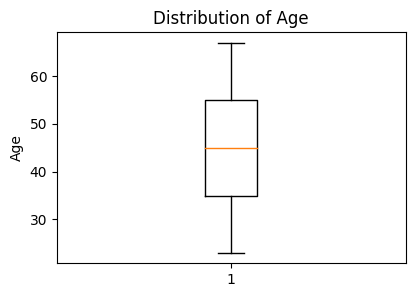

In [ ]:
plt.figure(figsize=(4.5, 3))
plt.boxplot(df['Age'])
plt.title('Distribution of Age')
plt.ylabel('Age')
plt.show()

2. Now replicate the above figure such that there is one box plot each for those customers who accepted the personal loan campaign and another for those who did not accept the personal loan campaign.

<Figure size 450x300 with 0 Axes>

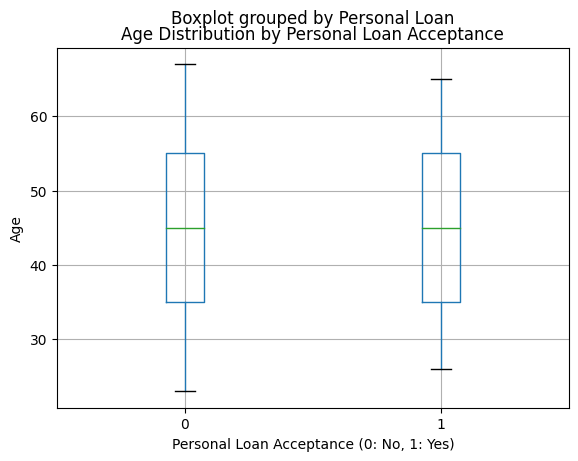

In [ ]:
plt.figure(figsize=(4.5, 3))
df.boxplot(column = 'Age', by='Personal Loan')
plt.title('Age Distribution by Personal Loan Acceptance')
plt.ylabel('Age')
plt.xlabel('Personal Loan Acceptance (0: No, 1: Yes)')
plt.show()

3. Use the above code to replicate the plot for each item in the provided list "cols". Use for-loop instead of creating the plots one by one and f-strings to ensure that the titles and axis-labels also change accordingly inside the loop.

<Figure size 450x300 with 0 Axes>

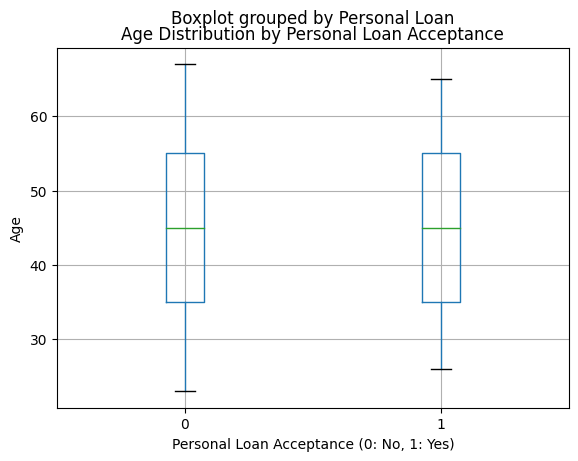

<Figure size 450x300 with 0 Axes>

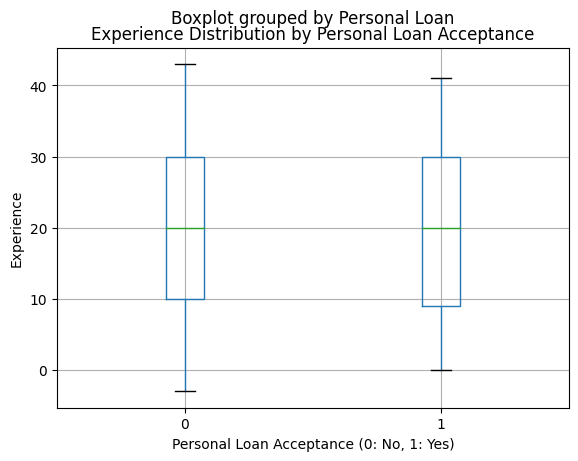

<Figure size 450x300 with 0 Axes>

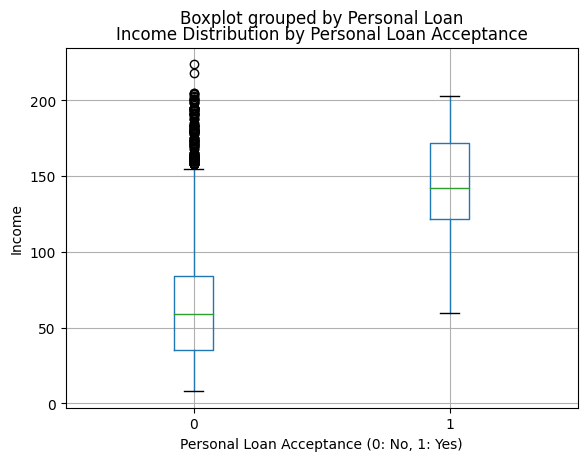

<Figure size 450x300 with 0 Axes>

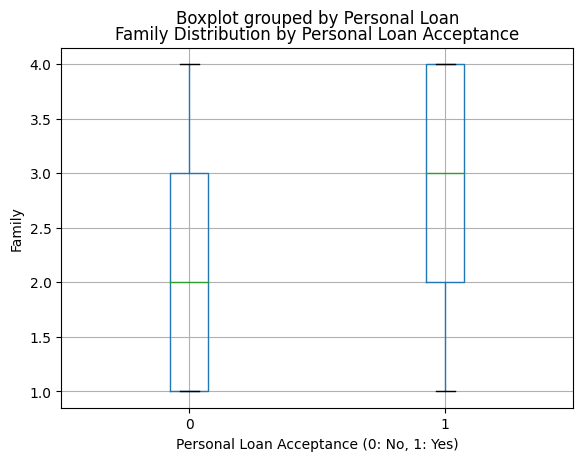

<Figure size 450x300 with 0 Axes>

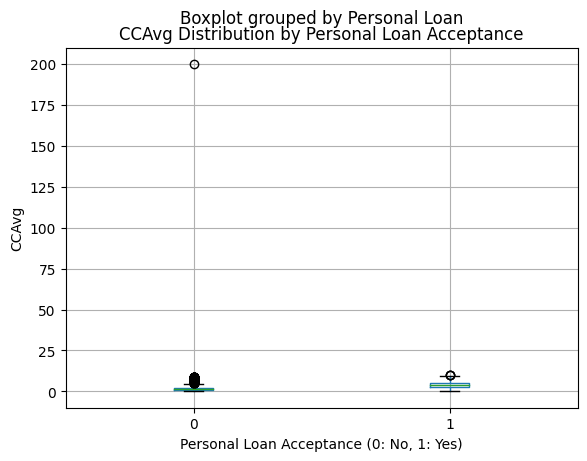

<Figure size 450x300 with 0 Axes>

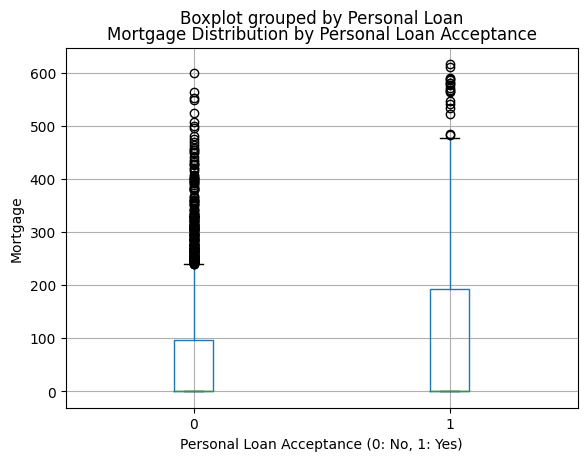

In [ ]:
cols = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']
# write your for-loop here
for col in cols:
  plt.figure(figsize=(4.5, 3))
  df.boxplot(column = col, by='Personal Loan')
  plt.title(f'{col} Distribution by Personal Loan Acceptance')
  plt.ylabel(col)
  plt.xlabel('Personal Loan Acceptance (0: No, 1: Yes)')
  plt.show()

6. Since the income distribution between the two groups were quite different, let's look at this difference again in a histogram. Create one for each group and set the value of parameter `bins` to 25. Give title and axis labels to the figure. Use `show` method to display the plot.

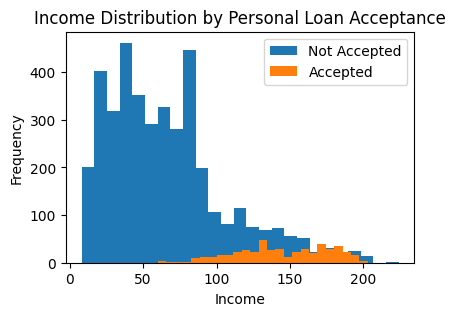

In [ ]:
plt.figure(figsize=(9, 6))
df.loc[df['Personal Loan'] == 0,'Income'].plot(kind='hist', bins=25, label='Not Accepted',
                                                         legend=True, figsize=(4.5, 3),)
df.loc[df['Personal Loan'] == 1,'Income'].plot(kind='hist', bins=25, label='Accepted',
                                                         legend=True, figsize=(4.5, 3),)
plt.title('Income Distribution by Personal Loan Acceptance')
plt.ylabel('Frequency')
plt.xlabel('Income')
plt.legend()
plt.show()

7. From the box plot of average credit card spending we see that there are quite a few customers who have high credit card average but did not accept personal loan. What can you say about their income level? Plot the income and credit card spending of all customers on a scatter plot and color the two groups (those who accepted the personal loan and those who did not) with different colors. To do so, first we use `groupby` to create the two groups. Then iterate over each group of the groupby object and plot the two variables of interest.

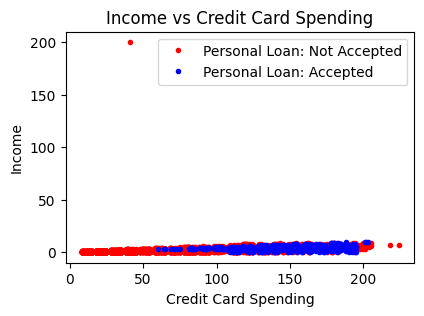

In [ ]:
plt.figure(figsize=(4.5, 3) )
groups = df.groupby('Personal Loan')
for name, group in groups:
    color = 'blue' if name == 1 else 'red'
    plt.plot(group['Income'], group['CCAvg'],
             label=f'Personal Loan: {"Accepted" if name == 1 else "Not Accepted"}', marker='.', linestyle='', color = color)
plt.title('Income vs Credit Card Spending')
plt.ylabel('Income')
plt.xlabel('Credit Card Spending')
plt.legend()
plt.show()

### C. Business Analytics
1. Now that we have visually inspected the continuous variables, let's work with the categorical variables. For each group (those who accepted personal loan and those who did not), report the percentage of customers who utilized the specific service with the bank or not. Provided below is one example for variable "Brokerage Account". Repeat for the remaining categorical variables.

**Challenge Yourself:** Perform the same task in one line of code. Hint: Use `groupby`, `size`, `apply` and `lambda` together. If you struggle to get relative frequency lookup the documentation of `level` parameter of the `groupby` method.

In [ ]:
catg_col = ['Personal Loan', 'Brokerage Account', 'GIC Account', 'Online', 'CreditCard']
print(catg_col)

# first create separate dataframes for converted and nonconverted customers
converted_clients = df[df['Personal Loan']==1]
converted_clients['Personal Loan'] = converted_clients['Personal Loan'].cat.codes

nonconverted_clients = df[df['Personal Loan']==0]
nonconverted_clients['Personal Loan'] = nonconverted_clients['Personal Loan'].cat.codes

['Personal Loan', 'Brokerage Account', 'GIC Account', 'Online', 'CreditCard']


<ipython-input-197-9dc362bcd10f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  converted_clients['Personal Loan'] = converted_clients['Personal Loan'].cat.codes
<ipython-input-197-9dc362bcd10f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonconverted_clients['Personal Loan'] = nonconverted_clients['Personal Loan'].cat.codes


In [ ]:
# calculate groupby statistics of brokerage account for converted and non converted clients
converted_brokerage_clients = converted_clients.groupby(['Personal Loan', catg_col[1]])
print(converted_brokerage_clients.size()/converted_brokerage_clients.size().sum())

nonconverted_brokerage_clients = nonconverted_clients.groupby(['Personal Loan',  catg_col[1]])
print(nonconverted_brokerage_clients.size()/nonconverted_brokerage_clients.size().sum())

Personal Loan  Brokerage Account
1              0                    0.875
               1                    0.125
dtype: float64
Personal Loan  Brokerage Account
0              0                    0.893257
               1                    0.106743
dtype: float64


In [257]:
# repeat for remaining categorical variables
for col in catg_col[1:]:
    print("-" * 40)
    # Calculate groupby statistics for converted clients
    converted_stats = converted_clients.groupby(['Personal Loan', col]).size() / converted_clients.groupby('Personal Loan').size()
    print("Converted Clients -", col)
    print(converted_stats)

    # Calculate groupby statistics for non-converted clients
    nonconverted_stats = nonconverted_clients.groupby(['Personal Loan', col]).size() / nonconverted_clients.groupby('Personal Loan').size()
    print("Non-converted Clients -", col)
    print(nonconverted_stats)

----------------------------------------
Converted Clients - Brokerage Account
Personal Loan  Brokerage Account
1              0                    0.875
               1                    0.125
dtype: float64
Non-converted Clients - Brokerage Account
Personal Loan  Brokerage Account
0              0                    0.893257
               1                    0.106743
dtype: float64
----------------------------------------
Converted Clients - GIC Account
Personal Loan  GIC Account
1              0              0.708333
               1              0.291667
dtype: float64
Non-converted Clients - GIC Account
Personal Loan  GIC Account
0              0              0.96218
               1              0.03782
dtype: float64
----------------------------------------
Converted Clients - Online
Personal Loan  Online
1              0         0.39375
               1         0.60625
dtype: float64
Non-converted Clients - Online
Personal Loan  Online
0              0         0.409555
    

2. Given the analysis thus far, which group of customers are most likely to convert on personal loan? Where should the bank focus its marketing efforts on?

In [ ]:
# write your answer to #2 here

# Brokerage Account: Among the customers who converted, 12.5% have a brokerage account, while among the customers who did not convert, only 10.7% have a brokerage account. Customers who have a brokerage account are more likely to convert on a personal loan, While the difference in brokerage account between converted and non-converted clients is relatively small.

# GIC Account: Customers who have a GIC (Guaranteed Investment Certificate) account are more likely to convert on a personal loan. Among the customers who converted, 29.17% have a GIC account, while among the customers who did not convert, only 3.78% have a GIC account. There is a significant differenct in GIC Account between clients who convert on personal loan.

# Online Banking: Customers who use online banking services are slightly more likely to convert on a personal loan. Among converted clients, 60.6% use online banking, while among the customers who did not convert, 59.0% use online banking. The difference in online banking usage is slightly small between converted and non-converted clients.

# Credit Card: Among the customers who converted, 29.8% have a credit card, while among the customers who did not convert, 29.7% have a credit card. The percentage of customers with credit cards is slightly higher among those who accepted personal loans.

## Conclusion:
Based on the analysis above, customers who are more likely to convert on personal loans are those who have GIC accounts. This can be shown from the higher percentage of converted clients with GIC accounts compared to non-converted clients. Moreover, users who use online banking also show a high probability of converting on personal loan. Therefore, the bank should focus its marketing efforts on promoting personal loans to customers who already have GIC accounts, as they are more likely to accept personal loan offers. In addition, leveraging online banking channels to reach out to potential customers may also be effective.


- There is not much difference in the age distribution of customers between the two groups.
- The minimum years of experience among customers who accepted the personal loan is 0 i.e. those in school did not take personal loan.
- Those who accepted the personal loan were mostly in higher income bracket.
- Those who accepted the personal loan generally tend to have family size of 2 or more.
- Those who accepted the personal loan tend to have on average higher credit card spending. But there are many customer who have higher spending and still did not accept the loan. They can be good target customers.
- Those who accepted the personal loan generally accepted regardless of whether they held mortgage or not. But When they do, they tend to have higher house mortgage value.
- Those who accepted the personal loan also have GIC account compared to those who did not.

3. A successful financial advisor can be considered one who sells most number of products given the number of clients they consult. Based on this definition, who are your top 10 most successful financial advisors? Follow the steps below:
    - Calculate the number of products sold to each customer. Hint: Convert data type to enable sum of categorical columns.
    - Calculate the number of products sold by each advisor. Hint: Utilize `groupby` on appropriate columns and `sum` to get total per advisor.
    - Calculate the number of customers consulted by each advisor. Hint: Same as last step but use `count` instead of `sum`.
    - Divide number of products sold by number of customer consulted for each advisor.
    - Pick the top 10 advisors based on the conversion rate calculated.

In [258]:
# Calculate the total number of products sold to each customer
df['Total Products Sold'] = df[['Personal Loan', 'Brokerage Account', 'GIC Account', 'Online', 'CreditCard']].sum(axis=1)

# Calculate the total number of products sold by each advisor
products_sold_by_advisor = df.groupby('Advisor Name')['Total Products Sold'].sum()

# Calculate the number of customers consulted by each advisor
customers_consulted_by_advisor = df.groupby('Advisor Name')['Advisor Name'].count()

# Step 4: Divide number of products sold by number of customer consulted for each advisor
conversion_rate = products_sold_by_advisor / customers_consulted_by_advisor

# Step 5: Pick the top 10 advisors based on the conversion rate calculated
top_10_advisors = conversion_rate.nlargest(10)

print("Top 10 Advisors According to Conversion Rate:")
print(top_10_advisors)

Top 10 Advisors According to Conversion Rate:
Advisor Name
Gita Pinelli         1.428571
Kathaleen Horgan     1.393617
Prudence Masters     1.353659
Jaquelyn Cubbage     1.349398
Val Sauceda          1.313953
Weston Jeon          1.300000
Berry Gartman        1.298701
Carylon Race         1.284091
Marcelene Thomson    1.277228
Jodie Izquierdo      1.271605
dtype: float64


4. How many of the top10 advisors have CFP designation? Follow the steps below:
    - Create a dictionary that contains Advisor Name as keys and CFP as values.
    - Ensure the top 10 advisors from previous questions is saved as DataFrame.
    - Use the Advisor Name values to map with CFP values in the dictionary created above. Hint: Look up `map` method.

In [ ]:
# write your answer to #4 here

# Create a dictionary containing Advisor Name as keys and CFP designation as values
cfp_dict = dict(zip(df['Advisor Name'], df['CFP']))

# Ensure the top 10 advisors from the previous question are saved as a DataFrame
top_10_advisors_df = top_10_advisors.reset_index()

# Use the Advisor Name values to map with the CFP values in the dictionary
top_10_advisors_df['CFP'] = top_10_advisors_df['Advisor Name'].map(cfp_dict)

# Count the number of advisors in the top 10 list who have the CFP designation
num_cfp_advisors = top_10_advisors_df['CFP'].sum()

# Display the result
print("Number of top 10 advisors have CFP designation:", num_cfp_advisors)


Number of top 10 advisors with CFP designation: 2


5. Repeat question 3 and 4 such that the top10 advisors are those who sell highest number of Personal Loan product to the customers they consult. Hint: If you ended up getting NaN in your results check the datatype of columns you are working with!

In [256]:
# Filter the DataFrame to include only customers who have accepted the Personal Loan
personal_loan_customers = df[df['Personal Loan'] == 1]

# Count the number of Personal Loan products sold by each advisor
loan_products_sold = personal_loan_customers.groupby('Advisor Name')['Personal Loan'].sum()

# Count the number of customers consulted by each advisor
loan_products_consulted = df.groupby('Advisor Name')['Advisor Name'].count()

# Calculate the conversion rate by dividing the number of Personal Loan products sold by advisor and number of customers consulted for each advisor
loan_products_conversion_rate = loan_products_sold / loan_products_consulted

# Sort the advisors based on the conversion rate and select the top 10
loan_products_top_10_advisors = loan_products_conversion_rate.nlargest(10)

# Create a dictionary containing Advisor Name as keys and CFP designation as values
cfp_dict = dict(zip(df['Advisor Name'], df['CFP']))

# Ensure the top 10 advisors from the previous step are saved as a DataFrame
loan_products_top_10_advisors_df = loan_products_top_10_advisors.reset_index()

# Use the Advisor Name values to map with CFP values in the dictionary
loan_products_top_10_advisors_df['CFP'] = loan_products_top_10_advisors_df['Advisor Name'].map(cfp_dict)

# Count the number of advisors in the top 10 list who have the CFP designation
num_cfp_loan_advisors = loan_products_top_10_advisors_df['CFP'].sum()

# Display the number of advisors with CFP designation in the top 10
print("Top 10 Advisors Selling the Highest Number of Personal Loan Products:")
print('\n'.join(loan_products_top_10_advisors.index))
print("\nNumber of top 10 Personal Loan Products advisors with CFP designation:", num_cfp_loan_advisors)

Top 10 Advisors Selling the Highest Number of Personal Loan Products:
Prudence Masters
Kathaleen Horgan
Gita Pinelli
Eulah Kicklighter
Jaquelyn Cubbage
Jacqueline Leveque
Weston Jeon
Val Sauceda
Corazon Eastin
Carylon Race

Number of top 10 Personal Loan Products advisors with CFP designation: 2
